In [2]:
# Program: Accessing an element in an array

def getElement(A, index):
    return A[index]

A = [10, 20, 30, 40, 50]
print(getElement(A, 2)) 

30


`return A[index]`
> In Python, lists are implemented as dynamic arrays, meaning that element access by index is a direct memory lookup. \
Retrieving an element from an array by index takes constant time in the worst case because Python lists provide $O(1)$ random access.


`print(getElement(A, 2))`
>The print function runs in $O(1)$ for simple integer outputs.

**Final Complexity: $O(1)$**
> The code executes in constant time, meaning its execution time does not depend on the size of the array. It will always take the same amount of time regardless of whether the array has 5 elements or 5 million elements.

However, when you create a list, the list requires memory allocation for n elements. Each element needs to be assigned a value.
This process scales linearly with the number of elements, hence **$O(n)$** complexity. 

In [4]:
def sumArray(A):
    total = 0
    for num in A:
        total += num
    return total

A = [1, 2, 3, 4, 5]
print(sumArray(A))  

15


* Assigning `total = 0` takes $O(1$). $\rightarrow Cost = 1$
* Loop iterating over array:
    * Runs $n$ times
    * Each iteration involves `total += num`, which is $O(1)$.  $\rightarrow Cost = 1$
    * Total $Cost = n$
* Returning the result (`return total`) takes $O(1)$ $\rightarrow Cost = 1$

Therefore $T(n)=1+n+1 = n+2$

When analyzing complexity, we ignore constant terms (like $+2$) since they do not significantly impact growth as $n$ increases.

Therefore $T(n) = n + 2 \Rightarrow O(n)$

In [7]:
def binarySearch(A, target):
    left, right = 0, len(A) - 1
    while left <= right:
        mid = (left + right) // 2
        if A[mid] == target:
            return mid
        elif A[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

A = [1, 3, 5, 7, 9, 11]
print(binarySearch(A, 7))

3


* Cost: `left = 0` and `right = len(A) - 1` are constant-time operations $\rightarrow O(1)$
* while `left <= right`:
    * The loop runs logarithmically. In each iteration, the search range is halved $\rightarrow O(log n)$ iterations
* `mid = (left + right) // 2` 
    * Computing mid is $O(1)$ since integer division is a constant-time operation.
* `if arr[mid] == target:  return mid`
    * Checking equality and returning mid are $O(1)$
* `elif arr[mid] < target: left = mid + 1`
    * $<$ operation and updating left take $O(1)$
* `else: right = mid - 1`
    * Updating right takes $O(1)$
* `return -1` takes $O(1)$

**Deriving $T(n)$**
* Each iteration reduces the search space by half.
* If we start with $n$ elements, the number of times we can halve $n$ before we reach 1 element is: **$T(n)=T(n/2)+O(1)$**
> $T(n)$ is the time taken for an input of size $n$. \
$T(n/2)$: Since binary search halves the list, the next step operates on size $n/2$\
$O(1)$: The constant-time operations (calculating mid, checking A[mid], updating left and right).

Expanding this by repeatedly applying the same formula:

$T(n) = T(n/2)+O(1)$ 

$T(n/2) = T(n/4)+O(1)$ 

$T(n/4) = T(n/8)+O(1)$ 

and so on..

**How Many Times Does the Loop Run?**

Since the search range halves in each step, the number of times we can halve $n$ before reaching 1 element is: $n,\frac{n}{2},\frac{n}{4},\frac{n}{8}, \ldots$

We stop when we reach 1 element, which happens when: $\frac{n}{{{2^k}}} = 1$

Solving for $k$:
* $n=2^k$
* $k=log_2n$

Thus, the number of times we repeat the process is $O(logn)$

At each step, we perform a constant amount of work $O(1)$, and there are $logn$ such steps

$T(n)=O(1)+O(1)+\dots+O(1)$ $\rightarrow logn$ times

So,  $T(n)=O(logn)+O(1)$ and hence the complexity is $O(logn)$

In [8]:
def findDuplicatePairs(A):
    for i in range(len(A)):
        for j in range(i + 1, len(A)):
            if A[i] == A[j]:
                print(f"Duplicate found: {A[i]}")

A = [1, 2, 3, 2, 4, 5, 1]
findDuplicatePairs(A)

Duplicate found: 1
Duplicate found: 2


Outer Loop (`for i in range(len(A))`)
* The outer loop runs from `i = 0 to i = len(A) - 1`, which means it iterates $n$ times, where $n$ is the length of the array

Inner Loop (`for j in range(i + 1, len(A))`)
* For each iteration of the outer loop, the inner loop starts at `j = i + 1` and goes until `j = len(A) - 1`. This means the number of iterations of the inner loop depends on the value of `i`
    * When `i = 0`, `j` runs from 1 to n-1 $\rightarrow$ n - 1 iterations.
    * When `i = 1`, `j` runs from 2 to n-1 $\rightarrow$ n - 2 iterations.
    * When `i = 2`, `j` runs from 3 to n-1 $\rightarrow$ n - 3 iterations.
    * and so on...
* The total number of iterations of the inner loop across all iterations of the outer loop is: $(n-1)+(n-2)+(n-3)+\dots +1=
\frac{n(n-1)}{2} = \frac{n^2-n}{2}=\frac{n^2}{2}-\frac{n}{2}$
* Therefore, the complexity is $O(n^2)$

Constant-Time Operations
* Inside the inner loop, the comparison` A[i] == A[j]` is a constant-time operation ($O(1)$). The print statement is also considered a constant-time operation in this analysis ($O(1)$).

Total complexity
* Outer loop: $O(n)$
* Inner loop: $O(n)$ per iteration of the outer loop
    * Total $O(n^2)$ for loop
* Comparison: $O(1)$ per iteration
* Print: $O(1)$ per iteration
* Overall Complexity: $O(n^2)$

$T(n)=Cost(outerloop) + Cost(inner loop) + Cost(operations-inside-inner-loop)$ 

$T(n)=O(n)+O(n^2)+O(1)$

Since $O(n^2)$ dominates $O(n)$, the overall complexity is $O(n^2)$

In [18]:
def fibonacci(n):
    if n <= 1:
        return n
    return fibonacci(n-1) + fibonacci(n-2)

print(fibonacci(5)) 

5


**Recurisve calls**

* For any value of $n$, the recurisve function `fibonacci()` calls itself twice
    1. `fibonacci(n-1)`
    2. `fibonacci(n-2)`
    
This recursive structure leads to a binary tree of recursive calls, where each node (representing a function call) branches into two child nodes (representing the two recursive calls).
* Base Case: If  $n\le 1$, the function returns $n$ directly without making further recursive calls.
* Recursive Case: For $n>1$, the function computes the result by adding the results of `fibonacci(n-1)` and `fibonacci(n-2)`

For complexity analysis
* Base case: $T(0)=T(1)=O(1)$ because these calls simply return a value without further recursion. 
* Recursive case: For $n>1$, the function makes two recursive calls
    * $T(n)=T(n-1)+T(n-2)+O(1)$
    * $O(1)$ accounts for the addition of the two results.
* Thus the complexity of fibonacci function is $T(n)=T(n-1)+T(n-2)+O(1)$

The recurrence relation $T(n)=T(n-1)+T(n-2)+O(1)$  is very similar to the definition of the Fibonacci sequence itself.

For simplicity, we first analyze the homogeneous part (ignoring the constant term $O(1)$).

$T(n)=T(n-1)+T(n-2)$

Assume a solution of the form $T(n)=r^n$, where $r$ is a constant to be determined.

Substitute $T(n)=r^n$, $T(n-1)=r^{n-1}$ and $T(n-2)=r^{n-2}$ into $T(n)=T(n-1)+T(n-2)$

$r^n=r^{n-1}+r^{n-2}$

Divide both sides by $r^{n-2}$ (assuming $r\ne 0$)

$r^2=r+1$

Therefore, the characteristic equation is $r^2-r-1=0$

Solve the quadratic equation $r^2-r-1=0$ using the quadratic formula:

$r = \frac{{1 \pm \sqrt {1 + 4} }}{2} = \frac{{1 \pm \sqrt 5 }}{2}$

Therefore, the roots are, ${r_1} = \frac{{1 + \sqrt 5 }}{2},{r_2} = \frac{{1 - \sqrt 5 }}{2}$

The general solution to the homogeneous recurrence is a linear combination of the roots

$T(n) = A \cdot {\phi ^n} + B \cdot {\psi ^n}$, where $A$ and $B$ are constants determined by initial conditions (e.g: $T(0)$ and $T(1)$)

Since $\left| \psi  \right| < 1$ ($r_2<1$) the term $B \cdot {\psi ^n}$ vanishes exponentially as $n \to \infty$. Thus, for large $n$ $T(n) \approx A \cdot {\phi ^n}$.

This gives the asymptotic time complexity $T(n)=O(1.618^n) \approx O(2^n)$


<img src=images/fibo.jpg width="800" height="800">



**Another explanation**

* Level 0 (Root): 1 call: fibonacci(n)
* Level 1:2 calls: fibonacci(n-1) and fibonacci(n-2)
* Level 2:4 calls: fibonacci(n-2), fibonacci(n-3), fibonacci(n-3), fibonacci(n-4)
* Level k: $2^k$  calls


* Height of the tree: 𝑛 because each level reduces the argument by 1
* Total Number of Calls: sum of nodes at all levels of the tree

$T(n)=1+2+4+\dots +2^n$

*  Sum of the first $n$ terms of a geometric series where the first term $a=1$ and the common ratio $r=2$

$\begin{array}{l}
T(n) = 1 + 2 + 4 +  \ldots  + {2^n}\\
S = \frac{{{r^{n + 1}} - 1}}{{r - 1}} = \frac{{{2^{n + 1}} - 1}}{{2 - 1}} = {2^{n + 1}} - 1\\
T(n) = O\left( {{2^n}} \right)
\end{array}$

In [ ]:
# O(3^n) 
def expo(n):
    if n <= 1:
        return n
    return expo(n-1) + expo(n-2) + expo(n-3)


In [21]:
#Compute the complexity of the following functions

def bubbleSort(A):
    n = len(A)
    for i in range(n):
        for j in range(n - i - 1):
            if A[j] > A[j + 1]:
                A[j], A[j + 1] = A[j + 1], A[j]

def selectionSort(A):
    n = len(A)
    for i in range(n):
        min_index = i
        for j in range(i + 1, n):
            if A[j] < A[min_index]:
                min_index = j
        A[i], A[min_index] = A[min_index], A[i]

def insertionSort(A):
    n = len(A)
    for i in range(1, n):
        key = A[i]
        j = i - 1
        while j >= 0 and A[j] > key:
            A[j + 1] = A[j]
            j -= 1
        A[j + 1] = key

In [5]:
#O(c^n)
def generateAllStrings(chars, length):
    if length == 0:
        return ['']

    result = []
    shorterStrings = generateAllStrings(chars, length - 1)
    
    for string in shorterStrings:
        for char in chars:
            result.append(string + char)
    
    return result

def main():
    chars = 'abc'
    n = 3
    result = generateAllStrings(chars, n)
    print(f"Generated {len(result)} strings of length {n} using characters '{chars}'")
    print("First 10 results:", result[:10])

if __name__ == "__main__":
    main()

Generated 27 strings of length 3 using characters 'abc'
First 10 results: ['aaa', 'aab', 'aac', 'aba', 'abb', 'abc', 'aca', 'acb', 'acc', 'baa']


In [7]:
#O(3^n)
def generateTernaryStrings(n, current=""):
    if n == 0:
        print(current)
        return
    for digit in "012":
        generateTernaryStrings(n - 1, current + digit)

generateTernaryStrings(4) 

0000
0001
0002
0010
0011
0012
0020
0021
0022
0100
0101
0102
0110
0111
0112
0120
0121
0122
0200
0201
0202
0210
0211
0212
0220
0221
0222
1000
1001
1002
1010
1011
1012
1020
1021
1022
1100
1101
1102
1110
1111
1112
1120
1121
1122
1200
1201
1202
1210
1211
1212
1220
1221
1222
2000
2001
2002
2010
2011
2012
2020
2021
2022
2100
2101
2102
2110
2111
2112
2120
2121
2122
2200
2201
2202
2210
2211
2212
2220
2221
2222


In [4]:
#O(logn)
def power(a, b):
    if b == 0:
        return 1  
    half = power(a, b // 2) 
    if b % 2 == 0:
        return half * half  
    else:
        return half * half * a  

a, b = 2, 10
print(f"{a}^{b} =", power(a, b))  

2^10 = 1024


In [1]:
# O(n^3) 
def cubic_function(n):
    count = 0
    for i in range(n):
        for j in range(n):
            for k in range(n):
                count += 1
    return count

In [2]:
# O(n log n) 
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

In [3]:
# O(log n) 
def logarithmic_iteration(n):
    count = 0
    while n > 1:
        n //= 2
        count += 1
    return count

In [4]:
# O(n)
def prefix_sum(arr):
    prefix_sums = [0] * (len(arr) + 1)
    for i in range(len(arr)):
        prefix_sums[i + 1] = prefix_sums[i] + arr[i]
    return prefix_sums

In [5]:
# O(sqrt(n)) 
def countDivisors(n):
    count = 0
    for i in range(1, int(math.sqrt(n)) + 1):
        if n % i == 0:
            count += 1 if i * i == n else 2
    return count





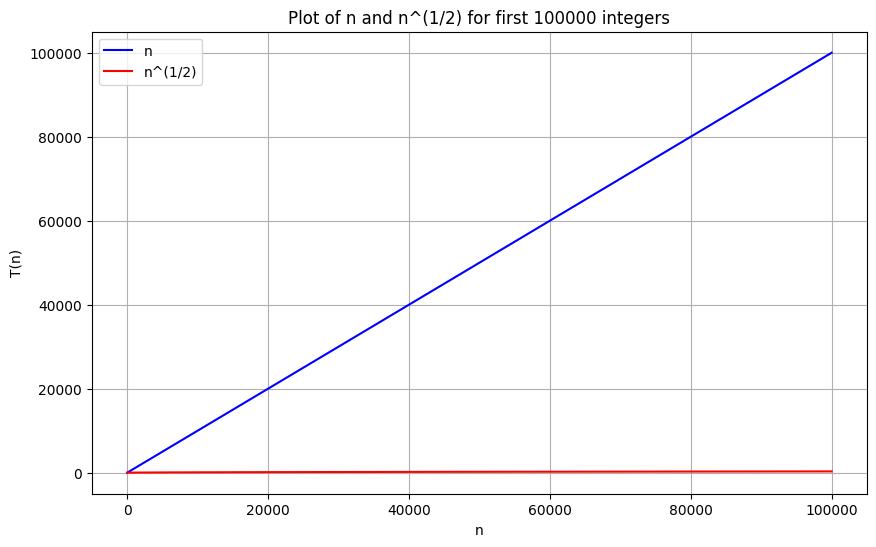

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plotFns(n):
    x = np.arange(1, n+1)
    y1 = x
    y2 = np.sqrt(x)
    plt.figure(figsize=(10, 6))
    plt.plot(x, y1, label="n", color='blue')
    plt.plot(x, y2, label="n^(1/2)", color='red')
    plt.xlabel('n')
    plt.ylabel('T(n)')
    plt.title(f'Plot of n and n^(1/2) for first {n} integers')
    plt.legend()
    plt.grid(True)
    plt.show()

plotFns(100000)

In [6]:
# O(n!) 
def permutations(string, step=0):
    if step == len(string):
        return ["".join(string)]
    result = []
    for i in range(step, len(string)):
        string_copy = [c for c in string]
        string_copy[step], string_copy[i] = string_copy[i], string_copy[step]
        result.extend(permutations(string_copy, step + 1))
    return result







In [7]:
# O(n^4) 
def quadruple_loop(n):
    count = 0
    for i in range(n):
        for j in range(n):
            for k in range(n):
                for l in range(n):
                    count += 1
    return count

In [14]:
# O(3^n) 
def expo(n):
    if n <= 1:
        return n
    return expo(n-1) + expo(n-2) + expo(n-3)




In [9]:
# O(2^n) 
def power_set(arr):
    result = [[]]
    for elem in arr:
        result.extend([subset + [elem] for subset in result])
    return result